In [1]:
exec(open("initKeras.py").read())

Using TensorFlow backend.


In [2]:
# #data preparation
inputDir = "F:\\myProjects\\tim209\\filtered by category\\output\\*.npy"
modelDirectory = "F:\\myProjects\\tim209\\doodle\\savedModels\\"
modelGraphDirectory = "F:\\myProjects\\tim209\\doodle\\experiment results\\"
dataUtils = dataUtils( inputDir )
dataUtils.process()

Processing aircraft carrier F:\myProjects\tim209\filtered by category\output\aircraft carrier.npy
Observation #: 20000
label hot vectors #: 20000
Processing airplane F:\myProjects\tim209\filtered by category\output\airplane.npy
Observation #: 20000
label hot vectors #: 20000
Processing alarm clock F:\myProjects\tim209\filtered by category\output\alarm clock.npy
Observation #: 20000
label hot vectors #: 20000
Processing ambulance F:\myProjects\tim209\filtered by category\output\ambulance.npy
Observation #: 20000
label hot vectors #: 20000
Processing angel F:\myProjects\tim209\filtered by category\output\angel.npy
Observation #: 20000
label hot vectors #: 20000
Processing animal migration F:\myProjects\tim209\filtered by category\output\animal migration.npy
Observation #: 20000
label hot vectors #: 20000
Processing ant F:\myProjects\tim209\filtered by category\output\ant.npy
Observation #: 20000
label hot vectors #: 20000
Processing anvil F:\myProjects\tim209\filtered by category\output\

In [3]:
(images, labels, classToLevels ) = dataUtils.getData()
(imagesR, labelsR, classToLevelsR ) = dataUtils.getRandomizedData()
images = dataUtils.reshapeDataForKeras( images )
imagesR = dataUtils.reshapeDataForKeras( imagesR )

(200000, 784) (200000, 10) {'aircraft carrier': 0, 'airplane': 1, 'alarm clock': 2, 'ambulance': 3, 'angel': 4, 'animal migration': 5, 'ant': 6, 'anvil': 7, 'apple': 8, 'arm': 9}


In [4]:
doodleModels = DoodleModels(images, labels)

train X: (160000, 28, 28, 1)
test X: (40000, 28, 28, 1)
train Y: (160000, 10)
test Y: (40000, 10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                9248      
__________

Epoch 1/15
160000/160000 [==============================] - 79s 492us/step - loss: 1.7016 - categorical_accuracy: 0.4050
Epoch 2/15
160000/160000 [==============================] - 77s 483us/step - loss: 0.6703 - categorical_accuracy: 0.7958
Epoch 3/15
160000/160000 [==============================] - 77s 483us/step - loss: 0.4076 - categorical_accuracy: 0.8771
Epoch 4/15
160000/160000 [==============================] - 77s 484us/step - loss: 0.3239 - categorical_accuracy: 0.9003
Epoch 5/15
160000/160000 [==============================] - 77s 484us/step - loss: 0.2823 - categorical_accuracy: 0.9118
Epoch 6/15
160000/160000 [==============================] - 77s 483us/step - loss: 0.2542 - categorical_accuracy: 0.9194
Epoch 7/15
160000/160000 [==============================] - 77s 482us/step - loss: 0.2287 - categorical_accuracy: 0.9256
Epoch 8/15
160000/160000 [==============================] - 77s 482us/step - loss: 0.2081 - categorical_accuracy: 0.9311
Epoch 9/15
160000/160000 [======

160000/160000 [==============================] - 10s 63us/step - loss: 1.5479 - categorical_accuracy: 0.4596
Epoch 2/15
160000/160000 [==============================] - 9s 59us/step - loss: 1.0012 - categorical_accuracy: 0.6781
Epoch 3/15
160000/160000 [==============================] - 9s 59us/step - loss: 0.7767 - categorical_accuracy: 0.7568
Epoch 4/15
160000/160000 [==============================] - 9s 59us/step - loss: 0.6739 - categorical_accuracy: 0.7917
Epoch 5/15
160000/160000 [==============================] - 9s 59us/step - loss: 0.6090 - categorical_accuracy: 0.8129
Epoch 6/15
160000/160000 [==============================] - 9s 59us/step - loss: 0.5628 - categorical_accuracy: 0.8284
Epoch 7/15
160000/160000 [==============================] - 9s 59us/step - loss: 0.5289 - categorical_accuracy: 0.8384
Epoch 8/15
160000/160000 [==============================] - 9s 59us/step - loss: 0.5033 - categorical_accuracy: 0.8480
Epoch 9/15
160000/160000 [==============================] 

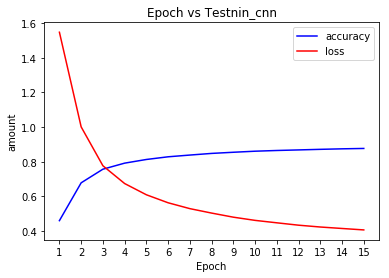

In [5]:
epochSize = 15
batchSize = 500
histories = []
for i in range(5):
    
    model = doodleModels.getModel( i + 1 )
    history, testLoss, testAcc = doodleModels.runModel( model, epochSize, batchSize )
    histories.append( ( model, history, testLoss, testAcc ) )
    
    epochX = np.arange(epochSize) + 1
    plt.close()
    plt.plot( epochX, history.history['categorical_accuracy'], color = "blue", label = "accuracy" )
    plt.plot( epochX, history.history['loss'], color = "red", label = "loss" )

    plt.title( 'Epoch vs Test ' + model.name )
    plt.xlabel( "Epoch" )
    plt.ylabel( "amount" )
    plt.xticks( epochX )
    plt.legend()
    
    plt.savefig( modelGraphDirectory + model.name + "_e" + str( epochSize ) + "_b" + str( batchSize ) + ".png" )
    
    
    